In [1]:
 

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 



In [2]:
df = pd.read_csv('./Datasets/Analyst_Coding_Test_(1).csv')
print('Length of Dataset: ', len(df))
print('Column Names:\n', df.columns)
df.head()

Length of Dataset:  1000
Column Names:
 Index(['shape', 'color', 'area'], dtype='object')


,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0


# Draw a boxplot showing the area size distribution for each shape.

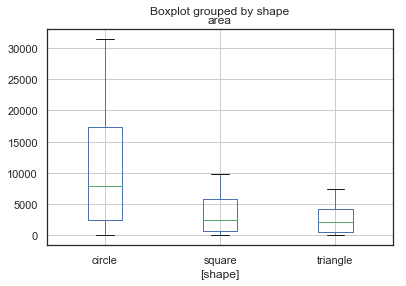

In [3]:
df.boxplot(by="shape")

# 2. Calculate the mean, max, and standard deviation of the area size of each color.

In [4]:
df_mean = df.groupby('shape').mean()
print(df_mean)

df_max = df.groupby('shape').max()
print(df_max)

df_sd = df.groupby('shape').std()
print(df_sd)

                  area
shape                 
circle    10703.482500
square     3411.299790
triangle   2564.967742
           color     area
shape                    
circle    yellow  31415.9
square    yellow   9801.0
triangle     red   7350.8
                 area
shape                
circle    9244.897540
square    2948.724746
triangle  2165.837676


# Avg size of a yellow sqaure 

In [5]:
yellow_sqaure = df[(df['shape'] == "square") & (df['color'] == "yellow") ]
print(yellow_sqaure.mean())

shape       0.000000
color       0.000000
area     3333.207207
dtype: float64


In [6]:
# avg size of yellow sq is 3333.207207

# Which shape is most likely to be green?

In [7]:
df_green=df[df['color']=='green']
df_green['shape'].value_counts()


square    47
circle    31
Name: shape, dtype: int64

In [8]:
#square most likley to be green 

# . Given the fact the the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?

In [9]:
df_red_3000=df[(df['color']=='red') & (df['area']>=3000)]
df_red_3000['shape'].value_counts()

triangle    84
square      21
circle      20
Name: shape, dtype: int64

In [10]:
for f in ['shape']:
    chance=df_red_3000['shape'].value_counts()/(84+21+20)
    print(chance)

triangle    0.672
square      0.168
circle      0.160
Name: shape, dtype: float64


# Write a function that calculates the side or radios of an object, depending on the shape and area of the object [for an Equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].

In [11]:
import math

In [12]:
#define the functions for each shape
def cir (area):
    return  math.sqrt(area/math.pi)
def tri (area):
     return  math.sqrt(area*4)/(math.sqrt(3))
def sq (area):
    return area **.5


In [13]:
#run specific function for each shape 
df.loc[df['shape'].str.contains('triangle'), 'side'] = df.area.apply(tri)
df.loc[df['shape'].str.contains('square'), 'side'] = df.area.apply(sq)
df.loc[df['shape'].str.contains('circle'), 'side'] = df.area.apply(cir)
df.head(3)



,shape,color,area,side
0,square,yellow,9409.0,97.000000
1,circle,yellow,4071.5,35.999982
2,triangle,blue,2028.0,52.000000


 # Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radios).

In [14]:
#already have side, just need to round

df.side=df.side.round().astype(int)
df.head(4)

,shape,color,area,side
0,square,yellow,9409.0,97
1,circle,yellow,4071.5,36
2,triangle,blue,2028.0,52
3,square,blue,3025.0,55


# Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?

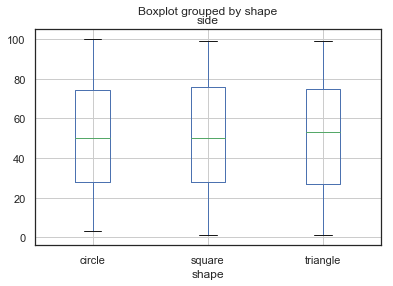

In [15]:
df.boxplot(by="shape", column="side")

In [16]:

#based on this we can see that all the shapes have about the same side/radius. the middle quartiles for all three shapes fall between apprx 25"-75"

# . Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.

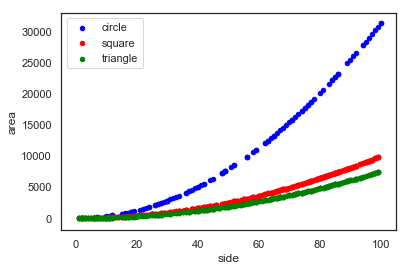

In [17]:
#group based on color,use subplots

fig, ax = plt.subplots()

colors = {'square':'red', 'circle':'blue', 'triangle':'green'}
grouped = df.groupby('shape')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='side', y='area', label=key, color=colors[key])

plt.show()

# Create a dataframe, table or list that show for each shape:
          a. The proportion of red objects within the shape
          b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).


In [18]:
df_tri = df[df['shape'] == "triangle"]
df_cir = df[df['shape'] == "circle"]
df_sq = df[df['shape'] == "square"]
df_sq.head(4)

,shape,color,area,side
0,square,yellow,9409.0,97
3,square,blue,3025.0,55
4,square,blue,9216.0,96
5,square,yellow,4356.0,66


In [19]:
#triangle
df_tri_red=df_tri[df_tri['color'] == "red"]
df_tri_red.shape[0]/df_tri.shape[0]
 

0.5062034739454094

In [20]:
#square
df_sq_red=df_sq[df_sq['color'] == "red"]
df_sq_red.shape[0]/df_sq.shape[0]

0.11740041928721175

In [21]:
#circle
df_cir_red=df_cir[df_cir['color'] == "red"]
df_cir_red.shape[0]/df_cir.shape[0]

0.25

In [22]:
#square
blue_sq_area=df_sq[df_sq['color'] == "blue"]
blue_sq_area['area'].sum()/df_sq["area"].sum()

0.36038508102925904

In [23]:
#triangle
blue_tri_area=df_tri[df_tri['color'] == "blue"]
blue_tri_area['area'].sum()/df_tri["area"].sum()

0.4738855857023727

In [24]:
#circle 
blue_cir_area=df_cir[df_cir['color'] == "blue"]
blue_cir_area['area'].sum()/df_cir["area"].sum()

0.06124595429571636

# 11.	Create a function that calculates 10. b. for a given shape and color.

In [25]:
df.set_index('color', inplace=True)
df_tri = df[df['shape'] == "triangle"]
df_cir = df[df['shape'] == "circle"]
df_sq = df[df['shape'] == "square"]
df_sq.head(4)

,shape,area,side
color,,,
yellow,square,9409.0,97
blue,square,3025.0,55
blue,square,9216.0,96
yellow,square,4356.0,66


In [26]:
def shape_cal(df_shape,color):
    y= df_shape["color"].area.sum()/df_shape["area"].sum()
    return y 
    

In [27]:
print("enter shape")
in_shape=input()
print("enter color")
in_color=input()

enter shape
square
enter color
blue


In [29]:
#fix syntax

if in_shape =="sqaure":
    print shape_cal(df_sq,in_color)
elif in_shape=="circle":
    print shape_cal(df_cir,in_color) 
elif in_shape=="triangle":
    print shape_cal(df_tri,in_color)


SyntaxError: invalid syntax (<ipython-input-29-7a9c82d4d32b>, line 4)